# Black Friday DataSet Sales Prediction

In [1]:
import time
import random
from math import *
import operator
import pandas as pd
import numpy as np
pd.set_option("display.max_columns", 10000)
import string
from pprint import pprint
from scipy import stats
import itertools

# import plotting libraries
import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from matplotlib import style
%matplotlib inline 

from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec

import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set(font_scale=1.5)


# import the ML algorithm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from statsmodels.tools.eval_measures import rmse
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans

from mlxtend.classifier import StackingClassifier
from mlxtend.regressor import StackingRegressor

# pre-processing
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing.data import QuantileTransformer
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest

# import libraries for model validation
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split


# import libraries for metrics and reporting
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import adjusted_rand_score

C:\Users\madan\anaconda\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.preprocessing.data module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.preprocessing. Anything that cannot be imported from sklearn.preprocessing is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
df_train = pd.read_csv(r'train.csv')
df_test = pd.read_csv(r'test.csv')

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [4]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233599 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     233599 non-null  int64  
 1   Product_ID                  233599 non-null  object 
 2   Gender                      233599 non-null  object 
 3   Age                         233599 non-null  object 
 4   Occupation                  233599 non-null  int64  
 5   City_Category               233599 non-null  object 
 6   Stay_In_Current_City_Years  233599 non-null  object 
 7   Marital_Status              233599 non-null  int64  
 8   Product_Category_1          233599 non-null  int64  
 9   Product_Category_2          161255 non-null  float64
 10  Product_Category_3          71037 non-null   float64
dtypes: float64(2), int64(4), object(5)
memory usage: 19.6+ MB


In [5]:
df_train.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [6]:
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [7]:
df_test.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2             72344
Product_Category_3            162562
dtype: int64

### Both Datasets have missing values , which we will take care of afterwards

In [8]:
df_train.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


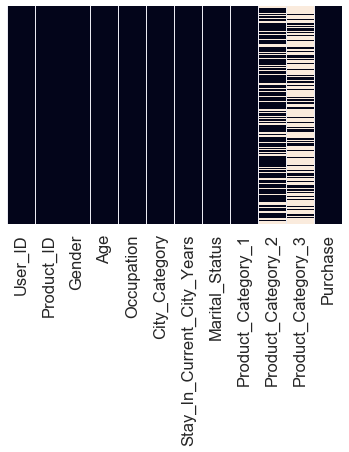

In [9]:
sns.heatmap(df_train.isnull(),yticklabels=False,cbar=False)

### Correlation matrix between the cols


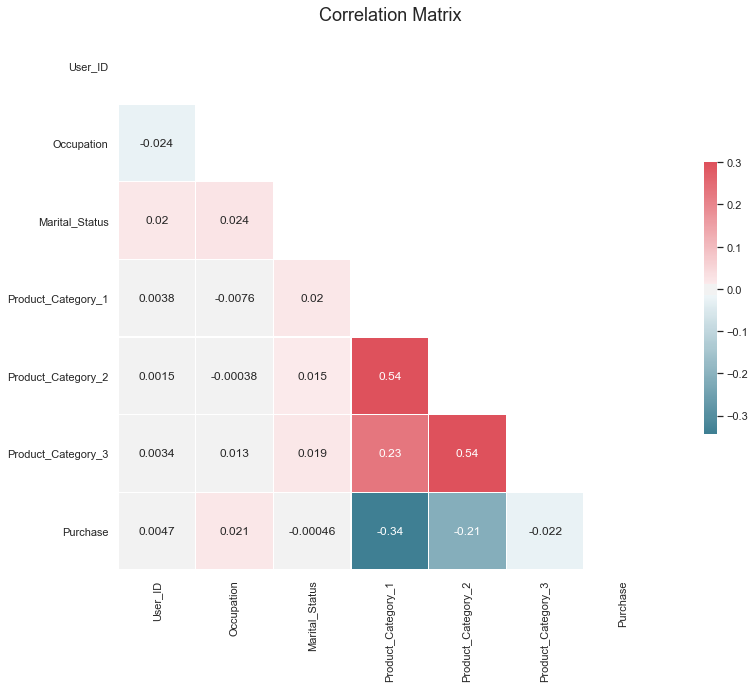

In [10]:
sns.set(style="white")

corr = df_train.corr()

mask = np.triu(np.ones_like(corr, dtype=np.bool))

f, ax = plt.subplots(figsize=(15, 10))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

plt.title('Correlation Matrix', fontsize=18)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.show()

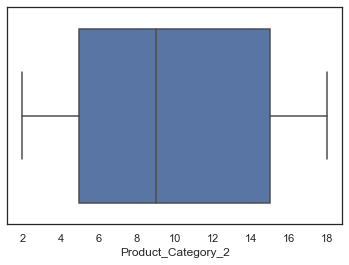

In [11]:
sns.boxplot(df_train['Product_Category_2'])

In [12]:
df_train['Product_Category_2'].fillna((df_train['Product_Category_2'].mean()), inplace=True)
df_train['Product_Category_3'].fillna((df_train['Product_Category_3'].mean()), inplace=True)


In [13]:
df_train.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [14]:
df_test['Product_Category_2'].fillna((df_test['Product_Category_2'].mean()), inplace=True)
df_test['Product_Category_3'].fillna((df_test['Product_Category_3'].mean()), inplace=True)


In [15]:
df_test.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
dtype: int64

In [16]:
df_train.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [17]:
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,9.842329,12.668243,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.000000,14.000000,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,9.842329,12.668243,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.000000,12.668243,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,9.842329,12.668243,7969


In [18]:
df_train['Gender'].replace(['M','F'],[0,1],inplace=True)

In [19]:
df_train["Age"].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [20]:
df_train["City_Category"].unique()

array(['A', 'C', 'B'], dtype=object)

In [21]:
X=df_train[['Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3']]
y=df_train['Purchase']

In [22]:
X.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1,0-17,10,A,2,0,3,9.842329,12.668243
1,1,0-17,10,A,2,0,1,6.000000,14.000000
2,1,0-17,10,A,2,0,12,9.842329,12.668243
3,1,0-17,10,A,2,0,12,14.000000,12.668243
4,0,55+,16,C,4+,0,8,9.842329,12.668243


In [23]:
X=pd.get_dummies(X,drop_first=True)
X.head()

,Gender,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,City_Category_B,City_Category_C,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
0,1,10,0,3,9.842329,12.668243,0,0,0,0,0,0,0,0,0,1,0,0
1,1,10,0,1,6.000000,14.000000,0,0,0,0,0,0,0,0,0,1,0,0
2,1,10,0,12,9.842329,12.668243,0,0,0,0,0,0,0,0,0,1,0,0
3,1,10,0,12,14.000000,12.668243,0,0,0,0,0,0,0,0,0,1,0,0
4,0,16,0,8,9.842329,12.668243,0,0,0,0,0,1,0,1,0,0,0,1


### Preparing the test Dataset in the same format for comparing the performance later

In [24]:
df_test['Gender'].replace(['M','F'],[0,1],inplace=True)

In [25]:
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,0,46-50,7,B,2,1,1,11.0,12.669454
1,1000009,P00113442,0,26-35,17,C,0,0,3,5.0,12.669454
2,1000010,P00288442,1,36-45,1,B,4+,1,5,14.0,12.669454
3,1000010,P00145342,1,36-45,1,B,4+,1,4,9.0,12.669454
4,1000011,P00053842,1,26-35,1,C,1,0,4,5.0,12.000000


In [51]:
df_test=df_test.drop(['User_ID','Product_ID'],axis=1,inplace=True)


In [26]:
df_test.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3'],
      dtype='object')

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state =0)

### Machine Learning Models - 

In [28]:
regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [29]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 2231.554884866405
Mean Squared Error: 9406511.175179431
Root Mean Squared Error: 3067.0036151233066


### XGBOOST

In [30]:
import xgboost as xgb
xlf = xgb.XGBRegressor(objective="reg:linear", seed=1729)
xlf.fit(X_train, y_train, eval_metric='rmse', verbose = True, eval_set = [(X_test, y_test)])

[11:24:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:7689.25781
[1]	validation_0-rmse:5793.10059
[2]	validation_0-rmse:4582.62109
[3]	validation_0-rmse:3851.21973
[4]	validation_0-rmse:3438.41040
[5]	validation_0-rmse:3209.73950
[6]	validation_0-rmse:3092.13257
[7]	validation_0-rmse:3025.12524
[8]	validation_0-rmse:2983.95825
[9]	validation_0-rmse:2964.00195
[10]	validation_0-rmse:2954.02197
[11]	validation_0-rmse:2945.41650
[12]	validation_0-rmse:2938.93262
[13]	validation_0-rmse:2935.61450
[14]	validation_0-rmse:2933.02197
[15]	validation_0-rmse:2930.75195
[16]	validation_0-rmse:2928.90332
[17]	validation_0-rmse:2926.74731
[18]	validation_0-rmse:2924.72510
[19]	validation_0-rmse:2921.47974
[20]	validation_0-rmse:2920.53711
[21]	validation_0-rmse:2917.77197
[22]	validation_0-rmse:2916.71655
[23]	validation_0-rmse:2915.17798
[24]	validation_0

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:linear', random_state=1729, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, seed=1729, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [31]:
preds = xlf.predict(X_test)

In [32]:
from sklearn.metrics import  mean_squared_error
mse= mean_squared_error(y_test,preds)
rmse=sqrt(mse)

In [33]:
print('\nRoot Mean Square error" ', rmse)



Root Mean Square error"  2870.30767175401


## Random selection of parameters


In [34]:
%timeit
regressor = RandomForestRegressor(n_estimators=100,criterion="mse", random_state=0,min_samples_leaf=13 )
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)


In [35]:

print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root Mean Squared Error: 2887.853729607548


## RandomizedCV

In [36]:

#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [37]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [38]:
rf = RandomForestRegressor()

In [40]:
from sklearn.model_selection import RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = -1)

In [41]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 169.9min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 248.2min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [43]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 5,
 'min_samples_leaf': 10,
 'max_features': 'auto',
 'max_depth': 20}

In [44]:
rf_random.best_score_

-8409288.087588048

In [45]:
predicted_y=rf_random.predict(X_test)

In [55]:
df_test=pd.read_csv(r'test.csv')

In [56]:
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [59]:
df_test.drop(['User_ID','Product_ID'],axis=1,inplace=True)

In [60]:
df_test.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,M,46-50,7,B,2,1,1,11.0,NaN
1,M,26-35,17,C,0,0,3,5.0,NaN
2,F,36-45,1,B,4+,1,5,14.0,NaN
3,F,36-45,1,B,4+,1,4,9.0,NaN
4,F,26-35,1,C,1,0,4,5.0,12.0


In [61]:
df_test['Gender'].replace(['M','F'],[0,1],inplace=True)

In [62]:
df_test['Product_Category_2'].fillna((df_test['Product_Category_2'].mean()), inplace=True)
df_test['Product_Category_3'].fillna((df_test['Product_Category_3'].mean()), inplace=True)

In [63]:
df_test.isnull().sum()

Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
dtype: int64

In [64]:
T=pd.get_dummies(df_test,drop_first=True)

In [65]:
T.head()

,Gender,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,City_Category_B,City_Category_C,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
0,0,7,1,1,11.0,12.669454,0,0,0,1,0,0,1,0,0,1,0,0
1,0,17,0,3,5.0,12.669454,0,1,0,0,0,0,0,1,0,0,0,0
2,1,1,1,5,14.0,12.669454,0,0,1,0,0,0,1,0,0,0,0,1
3,1,1,1,4,9.0,12.669454,0,0,1,0,0,0,1,0,0,0,0,1
4,1,1,0,4,5.0,12.000000,0,1,0,0,0,0,0,1,1,0,0,0


In [66]:
Test_y=rf_random.predict(T)

In [46]:

print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,predicted_y)))

Root Mean Squared Error: 2889.8047281459253


In [47]:
import pickle
# open a file, where you ant to store the data
file = open('random_forest_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)

In [68]:
predf=pd.DataFrame(Test_y)
predf.head(5)

,0
0,14887.658552
1,10180.852747
2,6281.257340
3,2340.493338
4,2862.358610


In [70]:
submf=pd.read_csv(r'samplesubmission.csv')

In [71]:
submf.columns

Index(['Purchase', 'User_ID', 'Product_ID'], dtype='object')

In [84]:
submf.head()

,Purchase,User_ID,Product_ID
0,100,1000004,P00128942
1,100,1000009,P00113442
2,100,1000010,P00288442
3,100,1000010,P00145342
4,100,1000011,P00053842


In [77]:
df_att1=pd.concat([predf,submf['User_ID'],submf['Product_ID']],axis=1)

In [78]:
df_att1.head()

,0,User_ID,Product_ID
0,14887.658552,1000004,P00128942
1,10180.852747,1000009,P00113442
2,6281.257340,1000010,P00288442
3,2340.493338,1000010,P00145342
4,2862.358610,1000011,P00053842


In [82]:
df_att1=df_att1.rename(columns= {0 : "Purchase"})

In [83]:
df_att1.head()

,Purchase,User_ID,Product_ID
0,14887.658552,1000004,P00128942
1,10180.852747,1000009,P00113442
2,6281.257340,1000010,P00288442
3,2340.493338,1000010,P00145342
4,2862.358610,1000011,P00053842


In [85]:
df_att1.to_csv("sample_submissiontry1.csv",index=False)